https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [3]:
base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"
data = pd.read_csv(base_dir)
# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])
# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()
# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

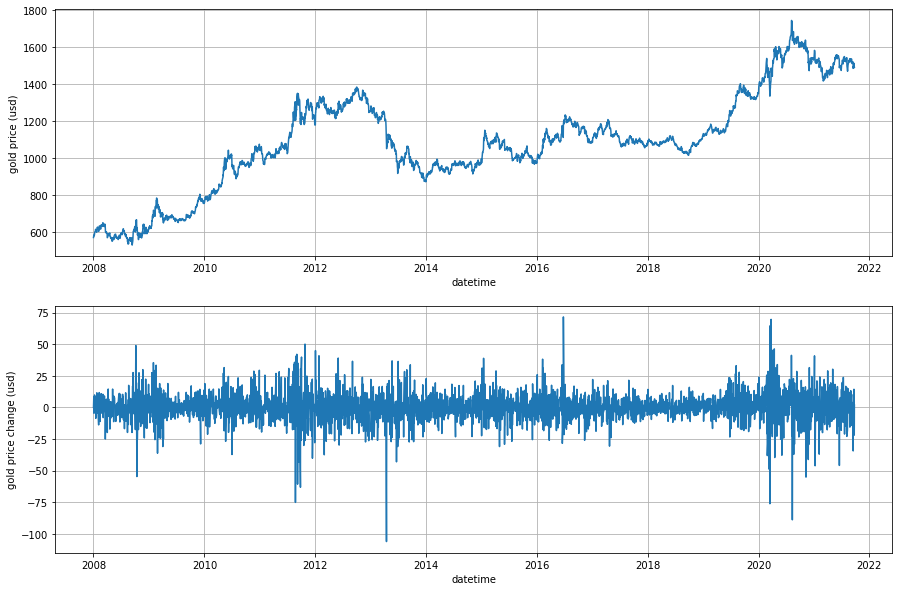

In [4]:

# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

In [5]:
# Use the daily change in gold price as the observed measurements X.
X = data[["gold_price_change"]].values
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [7]:
print("Unique states:")
print(states)

Unique states:
[2 1 0]


In [8]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[3.32508873e-62 1.66325955e-55 1.00000000e+00]


In [11]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[1.89810373e-01 8.09810580e-01 3.79046999e-04]
 [6.94185217e-01 2.50361535e-01 5.54532479e-02]
 [1.20187190e-02 8.31825202e-03 9.79663029e-01]]


In [13]:
print("\nGaussian distribution means:")
print(model.means_)


Gaussian distribution means:
[[ 0.7397907 ]
 [-0.19088674]
 [ 0.26209205]]


In [14]:
print("\nGaussian distribution covariances:")
print(model.covars_)


Gaussian distribution covariances:
[[[ 92.12602324]]

 [[365.63477954]]

 [[ 44.70114603]]]


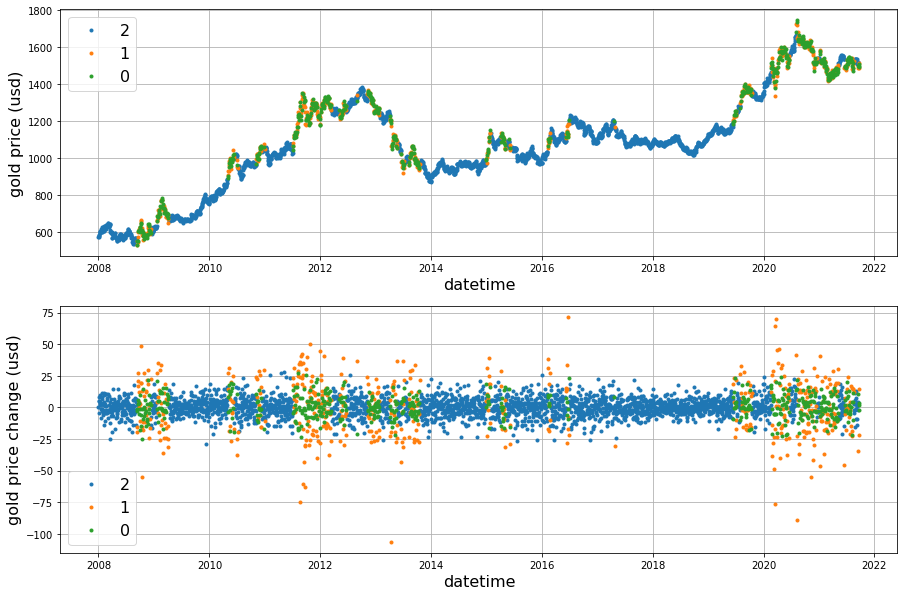

In [15]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()